# Programming for Data Science and Artificial Intelligence

## Multinomial Logistic Regression from Scratch

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

### Implementation

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{Y}$ and $\mathbf{W}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{Y}$ -> $(m, k)$
        - $\mathbf{W}$ -> $(n, k)$
        - where $k$ is number of classes
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict using the softmax function
   $$ h = P(y = c \mid \boldsymbol{\theta}) = \frac{e^{\boldsymbol{\theta}^{T}_c\mathbf{x}}}{\Sigma_{i=1}^{k} e^{\boldsymbol{\theta}_k^{T}\mathbf{x}}}$$
   where c is the class
   
   --->why this function?<----
   - First, mathematically, this is just an extension of the sigmoid formula for multi-class classification
   - $e$ will always give non-negative outputs which helps, since probability is never negative
   - $e$ has a similar effect as argmax, which will turn larger input to larger outputs.
   - $e$ is super easy to differentiate, because derivative of $e$ is $e$
   - $e$ nicely cancel out the $\log$ in the cross entropy loss (see below)
   - By dividing, it make sure all the probability adds up to one.  You can think the softmax function as some form of normalization.   Why not normalization?  Because normalization cares only about proportion, while softmax reacts to change in scale better.

### Softmax function

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

X = np.array([[1, 2, 3],
             [2, 4, 5]])

print("X: ", X.shape)  #(m, n) two samples, three features.  We ignore the y-intercept

#####important########
#note that Y in a multi-class classification is one-hot NOT class label
Y = np.array([[0, 0, 1, 0],
              [1, 0, 0, 0]])  #(m, k) let's say four classes

print("Y: ", Y.shape)

W = np.array([[1, 2, 3, 4],
              [2, 3, 1, 0],
              [1, 2, 5, 1],
              ])  #(n, k)  three features, four classes

print("W: ", W.shape)

print("X @ W:",  X @ W)  #X @ W should be the same shape as our y

print("softmax(X @ W):", softmax(X@W))

np.set_printoptions(suppress=True)
print("Try to confirm it adds up to 1:", softmax(X@W).sum(axis=1))

print("if I want to know which one is the answer, use argmax: ", np.argmax(softmax(X@W), axis=1))

from sklearn.preprocessing import normalize
print("normalization(X @ W):", normalize(X@W))

X:  (2, 3)
Y:  (2, 4)
W:  (3, 4)
X @ W: [[ 8 14 20  7]
 [15 26 35 13]]
softmax(X @ W): [[6.12896865e-06 2.47260243e-03 9.97519014e-01 2.25472156e-06]
 [2.06089928e-09 1.23394576e-04 9.99876603e-01 2.78912388e-10]]
Try to confirm it adds up to 1: [1. 1.]
if I want to know which one is the answer, use argmax:  [2 2]
normalization(X @ W): [[0.30044631 0.52578104 0.75111577 0.26289052]
 [0.31311215 0.54272772 0.73059501 0.27136386]]


### Cross entropy loss

3. Calculate the loss using the cross entropy loss
    $$J = -\sum_{i=1}^m y^{(i)}\log(h^{(i)})$$
    
Note that this is no different with the previous binary cross entropy loss.  The binary cross entropy loss is now simply extended to multiclass

In [3]:
print("Y: ", Y)
print("h: ", softmax(X@W))
print("log: ", Y * np.log(softmax(X@W)))
print("log loss: ", -(Y * np.log(softmax(X@W))))
print("sum of log loss: ", np.sum(-(Y * np.log(softmax(X@W)))))

Y:  [[0 0 1 0]
 [1 0 0 0]]
h:  [[0.00000613 0.0024726  0.99751901 0.00000225]
 [0.         0.00012339 0.9998766  0.        ]]
log:  [[ -0.          -0.          -0.00248407  -0.        ]
 [-20.0001234   -0.          -0.          -0.        ]]
log loss:  [[ 0.          0.          0.00248407  0.        ]
 [20.0001234   0.          0.          0.        ]]
sum of log loss:  20.00260747339262


### Gradient

4. Calculate the gradient of theta of feature $j$ based on the loss function $J$
    - Suppose given 2 classes (k = 2) and 3 features (n = 3), first, our y will have shape of (sample, 2), where $y_1$ refers to the probability of the sample belonging to class 1, and $y_2$ is the probability of the sample belonging to class 2.  Here $y$ sums to 1.  We have the loss function as
       $$ J = -y_1 \log h_1 - y_2 \log h_2 $$
       where $h_1$ and $h_2$ are
       $$ h_1 = \frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)} $$
       $$ h_2 = \frac{\exp(g_2)}{\exp(g_1)+\exp(g_2)} $$
       where $g_1$ and $g_2$ are
       $$ g_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 $$
       $$ g_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3  $$
       where in $w_{ij}$, $i$ stands for feature and $j$ stands for class 
    - For example, to find the gradient of $J$ in respect to $w_{21}$, we simply can use the chain rule (or backpropagation) to calculate like this:
       $$ \frac{\partial J}{\partial w_{21}} = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}$$
   - If we know each of them, it is easy, where
       $$\frac{\partial J}{\partial h_{1}} = -\frac{y_1}{h_1}$$
       $$\frac{\partial J}{\partial h_{2}} = -\frac{y_2}{h_2}$$
       $$\frac{\partial h_{1}}{\partial g_{1}} = \frac{\exp(g_{1})}{\exp(g_{1}) + \exp(g_{2})} - (\frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)})^2 = h_1 (1 - h_1)$$
       $$\frac{\partial h_{2}}{\partial g_{1}} = \frac{-exp(g_2)exp(g_1)}{(\exp(g_1) + \exp(g_2)^2} = -h_2h_1$$
       $$\frac{\partial g_1}{\partial w_{21}} = x_2$$
    - For those who forgets how to do third and fourth, recall that the quotient rule
        $$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$
    - Putting everything together, we got
$$
\begin{aligned}
\frac{\partial J}{\partial w_{21}} &= \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}\\
&= -\frac{y_1}{h_1} * h_1 (1 - h_1) * x_2 + -\frac{y_2}{h_2} * -h_2h_1 * x_2 \\
&= x_2 (-y_1 + y_1h_1 + y_2h_1)\\
&= x_2 (-y_1 + h_1(y_1 + y_2))\\
&= x_2 (h_1 - y_1)\\
\end{aligned}
$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

**Note: Again, take it easy if you don't understand the derivative.  One good news is that the gradient turns out to be the same as past lesson!**

### Putting everything together

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[cond, each_class] = 1

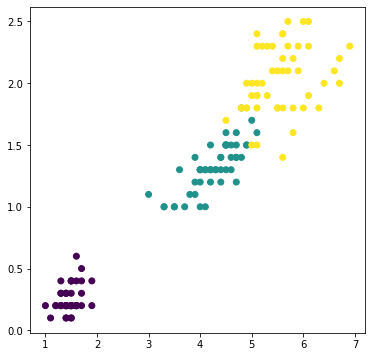

In [5]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [6]:
# Step 2: Fit your data

def logistic_regression_GD(X, Y, k, n, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    W = np.random.rand(n, k)
    l_rate = 0.01
    for i in range(max_iter):
        cost, grad =  gradient(X, Y, W)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        W = W - l_rate * grad
    return W, i

# for those who tend to feel overwhelmed with lots of code
# I recommend you to write each part of the code separately as function
# it helps!
def gradient(X, Y, W):
    m = X.shape[0]
    H = h_theta(X, W)
    cost = - np.sum(Y * np.log(H)) / m
    error = H - Y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(theta_t_x):
    return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, W):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
    return softmax(X @ W)

W, i = logistic_regression_GD(X_train, Y_train_encoded, k, X_train.shape[1], max_iter=5000)

Cost at iteration 0 1.019647659063904
Cost at iteration 500 0.0988357133475733
Cost at iteration 1000 0.09084675619734214
Cost at iteration 1500 0.08823236554878638
Cost at iteration 2000 0.08706655950680812
Cost at iteration 2500 0.0864574350217082
Cost at iteration 3000 0.08610413839122685
Cost at iteration 3500 0.0858824503319582
Cost at iteration 4000 0.08573414959185513
Cost at iteration 4500 0.0856294324482497


In [7]:
from sklearn.metrics import accuracy_score

yhat = np.argmax(h_theta(X_test, W), axis=1)
accuracy_score(y_test, yhat)

0.9333333333333333